# Leveraging customer information for strategic marketing campaigns in the banking industry 

## Problem statement
Capitalizing customer information is essential for the success of marketing campaigns in most businesses. In particular the banking industry spends large amounts of money and resources for marketing campaigns. Therefore, it is essential for banks to develop optimized marketing campaigns to reduce costs while maximizing effectiveness. One way to achieve this is to understand customer needs based on the available customer information. 
## Objective

In this project, we develop and evaluate machine learning models to predict whether a customer will subscribe to a term-deposit loan or not. Our developed model should also be able to predict the maximum duration of time the bank has to spend to a given a customer that would potentially subscribe to a term-deposit loan. 

The developed model will help the bank: 
- Understand its customers and cluster them into meaningful groups based on their demographic and transaction information
- Preidct customer response to its telemarketing campaigns
- Identify target customer groups for its future tele-marketing campaigns.

`A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.`

## Key data source
This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. Multiple contact to the same client was required in order to access if the response would be `yes` or not `no` subscribed.
It is publicly available in the UCI Machine Learning Repository, which can be retrieved from here (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).




# Data Wrangling

## Imports
Place imports at the start of the notebook so that you only need to consult one place to check your notebook dependencies.

In [63]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file
import warnings 
warnings.filterwarnings('ignore')

## Load The Bank Data

In [64]:

#df = pd.read_csv('bank-full.csv')

# set a path variable to the directory containing bank telemarketing data:. ../raw_data
path = '../raw_data'
# Concatenate directory path to the file name: bank_path
bank_path = path + '/bank-full.csv'
# Load data file to a dataframe: df
df = pd.read_csv(bank_path)

In [65]:
# Get number of rows and columns of our dataset: df.shape
df.shape

(45211, 17)

In [66]:
df.dtypes.nunique()
#df.head()

2

### Categorical features
Let us start exploring the categorical features of our data. 

In [67]:
# create a list containig categorcal feature names
categorical_features = list(df.select_dtypes('object').axes[1])
print(categorical_features)
len(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


10

In [68]:
# call the info method on df to see summary of the data
df.info(verbose=False);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 17 entries, age to Target
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [69]:
# Call the head method on df to view the first five rows of the data
df.head();

In [70]:
# Change duration unit to minutes from seconds
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

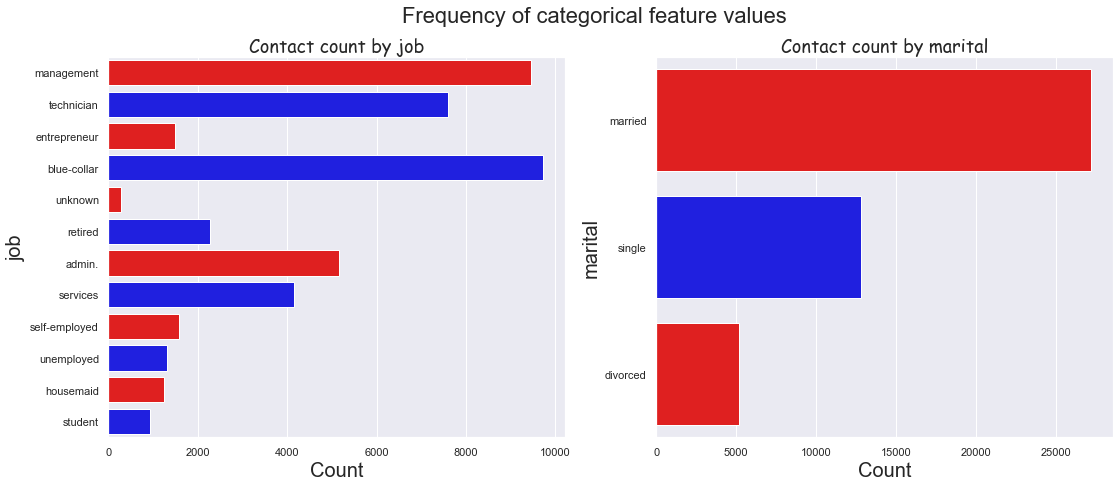

In [71]:
# The following function generates multiple plots frequency plots of 
def plot_multiple_categorical_features(data_frame,features_list):
        total = len(data_frame)
        axes = []
        i=0
#        while(i<len(features_list)):
        while (i < 2):
            # create subplots
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)
            fig.suptitle('Frequency of categorical feature values' , fontsize=22)
            
            sns.countplot(y= data_frame[features_list[i]] , palette=['red','blue'], ax=ax1)
          
            sns.countplot(y= data_frame[features_list[i+1]] , palette=['red','blue'], ax=ax2)
            ax1.set_title('Contact count by '+ features_list[i],fontname='Comic Sans MS', fontsize=18)
            
            
            ax2.set_title('Contact count by ' + features_list[i+1],fontname='Comic Sans MS', fontsize=18)
            ax1.set_ylabel(features_list[i], fontsize=20)
            ax2.set_ylabel(features_list[i+1], fontsize=20)
            ax1.set_xlabel('Count', fontsize=20)
            ax2.set_xlabel('Count', fontsize=20)
            
            i+=2
            
            axes.append(ax1)
            axes.append(ax2)

        return axes
    
plot_multiple_categorical_features(df,categorical_features);

In [72]:
def plot_multiple_categorical_against_target(self,columns,target='y'):
        axes = []
        i=0
        while(i<len(columns)):
            # create subplots
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)
            fig.suptitle('Identify the effect of each categorical variable' , fontsize=22)
            
            labels=["Didn't open term deposit","Open term deposit"]
            sns.countplot(x= self.data_frame[columns[i]] , palette=['salmon','gold'],  hue=self.data_frame[target], ax=ax1)
            
            
            
          
            sns.countplot(x= self.data_frame[columns[i+1]] , palette=['salmon','gold'],  hue=self.data_frame[target], ax=ax2)
            ax1.set_title('Count of Yes/No by '+columns[i],fontname='Comic Sans MS', fontsize=18)
            
            
            ax2.set_title('Count of Yes/No by ' + columns[i+1],fontname='Comic Sans MS', fontsize=18)
            ax1.set_xlabel(columns[i], fontsize=20)
            ax2.set_xlabel(columns[i+1], fontsize=20)
            ax1.set_ylabel('Count', fontsize=20)
            ax2.set_ylabel('Count', fontsize=20)
            
            i+=2
            
            axes.append(ax1)
            axes.append(ax2)
        return axes

## Explore the data
### Number of missing values by column
Count the number of missing values in each column and sort them

In [73]:
# Count (using .sum()) the number of missing values (.isnull()) in each column of df.
missing = df.isnull().sum()
missing;

We do not have any missing values in our dataset, meaning we do not have any 'nan' values.

In [74]:
# Use df's 'select_dtypes' method to select columns of type 'object'
df.select_dtypes('object').head();


In [75]:
# create a list containig categorcal feature names
categorical_features = list(df.select_dtypes('object').axes[1])
print(categorical_features)
len(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


10

We saw earlier that we had no missing values in our dataset. But are there any other issues with our dataset. We have \textbf{unknown} values in features such as below and we need to investigate what the \textbf{unknown} might mean.

- `job` - unknown value means the job of the client is not listed

- `education` - Education level is not known

- `contact` - Client contact method is not known

- `poutcome`. \textbf{unknown} value means the outcome of the previous marketing campaign which could be either success or   failure is not known. 

#### Unique value counts of categorical features


In [76]:
# use pandas .nunique() method to get the count of unique values for each categorical feature.
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

In [77]:
demographic_cat_features = ['job', 'marital', 'education']
financial_cat_features = ['default', 'housing', 'loan']
campaign_cat_features = ['contact', 'month', 'poutcome']

In [78]:
# Function for plotting multiple categorical features
# It specifically plots customers segmented by demographics, financial data, and campaingn details
def plot_categorical_features(data_frame,features_list):
        total = len(data_frame)
        axes = []
        i=0
        while(i<len(features_list)):
            # create subplots
            sns.set(font_scale=1.4)
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
            fig.set_size_inches(12, 4)
            if features_list[i] in demographic_cat_features:
                label = 'Demographic'
            if features_list[i] in financial_cat_features:
                label = 'Financial data segmented'
            if features_list[i] in campaign_cat_features:
                label = 'Previous and past campaign result segmented'
            fig.suptitle(label + ' distribution of customers contacted' , fontsize=22)
            plt.tight_layout()
            
            sns.countplot(y= data_frame[features_list[i]] , palette=['red','blue'], ax=ax1)
    
            sns.countplot(y= data_frame[features_list[i+1]] , palette=['red','blue'], ax=ax2)
            
            sns.countplot(y= data_frame[features_list[i+2]] , palette=['red','blue'], ax=ax3)
            ax1.set_title('Contact count by '+ features_list[i],fontname='Comic Sans MS', fontsize=18)
            
            
            ax2.set_title('Contact count by ' + features_list[i+1],fontname='Comic Sans MS', fontsize=18)
            ax3.set_title('Contact count by ' + features_list[i+2],fontname='Comic Sans MS', fontsize=18)
            
            
            
            ax1.set_ylabel(features_list[i], fontsize=20)
            ax2.set_ylabel(features_list[i+1], fontsize=20)
            ax3.set_ylabel(features_list[i+2], fontsize=20)
            #ax1.set_yticklabels('labels',fontsize=20)
          #  ax2.set_ylabel(features_list[i+1], fontsize=20)
          #  ax3.set_ylabel(features_list[i+2], fontsize=20)
            ax1.set_xlabel('Count', fontsize=20)
            ax2.set_xlabel('Count', fontsize=20)
            ax3.set_xlabel('Count', fontsize=20)
            
            i+=3
            
            axes.append(ax1)
            axes.append(ax2)
            axes.append(ax3)

        return axes
    

#### Demographic distribution of customers

Demographic segmentation is a systematic gouping of customers into distinct groups for the purpose of marketing. Effective marketing communication requires the identification of the right target group. Demographic segmentation is a commonly used technique in marketing where target categories based on one or more of socio-economic variables like job, age, gender, marital status, income, eduction, etc. In our case the categorical demongraphic content of the customers contacted by the bank includes `job`, `marital`, `education`. 

It is important to know the demographic content of the customers the bank has reached out during its campaign before determining how predictive a given demographic trait is in determining whether a customer will subscribe to a term deposit or not. Figure below shows the demographic distribution of customers contacted by the bank irrespective of whether they have subscribed or not. 

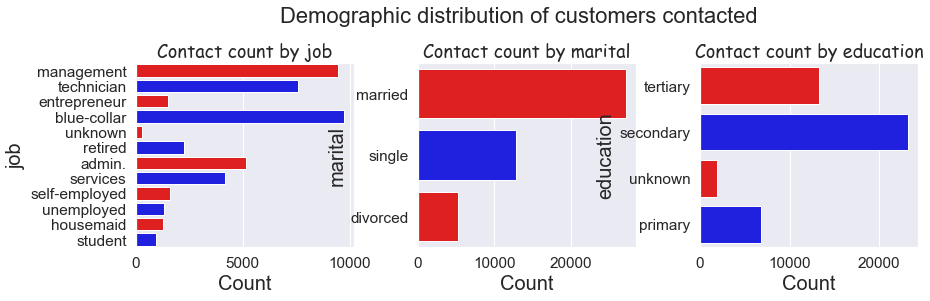

In [79]:
# Use function above to plot demographic content of customers contacted by the bank during the telemarketing.
plot_categorical_features(df,demographic_cat_features);

##### Customer jobs
Customers with `blue-collar` jobs were contacted the most during the marketing campaing. Customer's whose jobs is unknown (either not recroded or customer did not want to speficity) are targeted the least during the marketing campaign. Following customers with blue-collar managers, technicians, and adminstrators, respectively in decreasing order were contacted during the marketing compaign. As one might expect students were targeted the least during the marketing compaign.

##### Marital status

`Marital status` is another important trait used in demographic segmentaion. It provides useful information to target audience during marketing communication through promotional messages. Usually people in the same marital status group have common tastes and can can be easily targeted based on marital status. For example, generally people who are married need more financial strategy and are likely expected to respond to the term deposit marketing campaign.
The largest number of people contacted during the marketing campaing are `married`. The list contacted people are `divorced` individuals. 

##### Educational level
The level of education of an individual is also an important trait when segmenting population for marketing campaigns. For example educational level determines determines the choice of communication channel in passing across your message.
During the marketing campaign customer who completed high school are contacted the most. There are also a few number of contacts made where customer's education level is `UNKNOWN`. 

#### Financial distribution of customers

In addition to demographic segmentation, customers could be grouped together based on their account related to their finances. That is whether a customer has credit or not (`default`), has housing loan or not (`housing`), and has personal loan or not (`loan`).  Below we plot the distribution of customers segmented by their fiancail status. 

In [80]:
default = pd.concat([df['default'].value_counts(), df['default'].value_counts(normalize=True)*100.00],axis=1)
default.columns=['Has credit (Count)', '% (Credit)']
#print(default.head())
# Creat a new data frame with pd.concat containing the count of customers and percentages
housing = pd.concat([df['housing'].value_counts(), df['housing'].value_counts(normalize=True)*100.00],axis=1)
housing.columns=['Has housing loan (Count)', '% (housing)']
housing.head()
loan = pd.concat([df['loan'].value_counts(), df['loan'].value_counts(normalize=True)*100.00],axis=1)
loan.columns=['Has personal loan (Count)', '% (loan)']
housing.head()
housing_loan_credit = pd.concat([housing,loan,default],axis=1)
housing_loan_credit

,Has housing loan (Count),% (housing),Has personal loan (Count),% (loan),Has credit (Count),% (Credit)
yes,25130,55.583818,7244,16.022649,815,1.802659
no,20081,44.416182,37967,83.977351,44396,98.197341


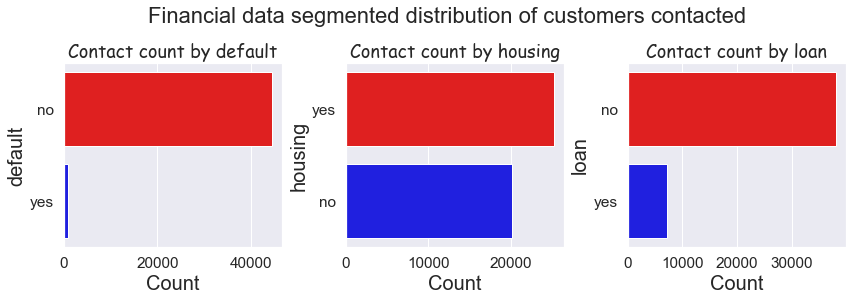

In [81]:
# plot financial segmented distribution
plot_categorical_features(df,financial_cat_features);

##### Has credit (`default`)
Majority of customers contacted by the bank do not have credit or did not default (98.2%). Only a few fraction (1.8%) of all the customers contacted had credit. Hence, credit might not be an important feature in determining whether a customer will subscribe to a term deposit or not. 

##### Housing loan
During this telemarketing campaign, the bank called an almost balanced number of customers depending whether they have housing loan or not. About 55% of the customers contacted by the bank during this telemarketing possess housing loan. The remaining about 45% of the customers contacted did not have housing loan.

##### Personal loan

The majority of customers (84%) called during this telemarketing did not have any personal loans. However, a non-negligible number of customers (16%) had personal loans.



#### Distribution of customers versus past and current camapaign details

In addition to demographic and financial segmentation, customers could be grouped together based on the details of the past and present campaign parameters.  That is how was the customer contacted (for example iphone or phone), the particular month the cusomter was contacted and the what was the outcome of the previous telemarketing campaign? 

Below we plot customers segmented by details of the past and present campaing.

In [82]:
# Creat a new data frame with pd.concat containing the count of customers and percentages based on the contact type used.

contact = pd.concat([df['contact'].value_counts(), df['contact'].value_counts(normalize=True)*100.00],axis=1)
contact.columns=['Count', '%']

# Creat a new data frame with pd.concat containing the count of customers and percentages based on which season
# was the customer contacted
month = pd.concat([df['month'].value_counts(), df['month'].value_counts(normalize=True)*100.00],axis=1)
month.columns=['Count', '%']
month.sort_index(inplace=True)
# Creat a new data frame with pd.concat containing the count of customers and percentages based on the outcome
# previous campaign
poutcome = pd.concat([df['poutcome'].value_counts(), df['poutcome'].value_counts(normalize=True)*100.00],axis=1)
poutcome.columns=['Count', '%']
lst = list(month.index)
# Combine dataframes contact,month, 
df_month_contact = pd.concat([contact,month,poutcome],axis=0,keys=['contact','season','poutcome'])
df_month_contact.head(12)
df_month_contact.fillna('-')

Count          %
contact  cellular   29285  64.774059
         unknown    13020  28.798301
         telephone   2906   6.427639
season   apr         2932   6.485147
         aug         6247  13.817434
         dec          214   0.473336
         feb         2649   5.859194
         jan         1403   3.103227
         jul         6895  15.250713
         jun         5341  11.813497
         mar          477   1.055053
         may        13766  30.448342
         nov         3970   8.781049
         oct          738   1.632346
         sep          579   1.280662
poutcome unknown    36959  81.747805
         failure     4901  10.840282
         other       1840   4.069806
         success     1511   3.342107

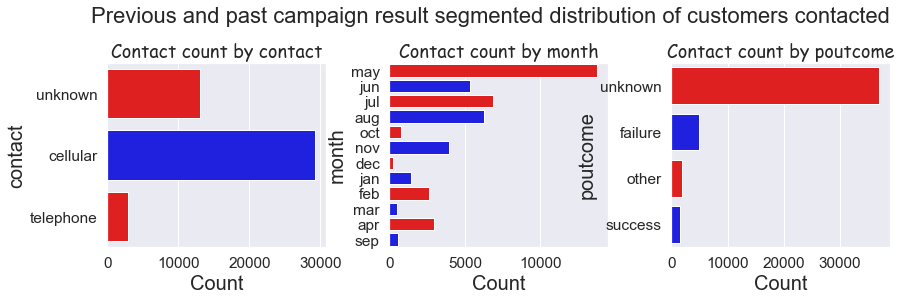

In [83]:
# plot campaign segmented distribution
plot_categorical_features(df,campaign_cat_features);

##### Contact
During this telemarketing, the majority of the customers (65%) were concated using cellular phones. While contacts made through land lines amounted only to 6.5%, a significant fraction of customers (29%) were contacted through mode of communication that was not registered and marked  as `unknown`. 
Different segments of the populations prefer different methods of contact. The communication channel used during the marketing campaign is essential. The largest number of customers were contacted through cellular phone. The least popular method of contact was through telephone. During the marketing campaign, 65% of the population contacted by the bank was through cellualr phones. Only 6.4% contacted through a telephone line while about 29% contacted through an unknown (unspecified) mode of communication. 

##### Season customer contacted


The season when the bank should contact target population segment is also an important trait for the success of the marketing camapaign. The largest number of contacts were made during spring and summer seasons with combined contact rate of 79 %. This is understandable since spring and summer are the beginning and end dates of the tax season; where customers may be motivated for financial plans due to expected tax returns. Barely any telemarketing was conducted during the winter which is understandable as it is the holiday and end of year season.


##### Previous marketing outcome
Success rate of the previous marketing exercise is only 3.3% while that of failure is 10.8%. 

- `Issue`
There are two ambigous values in this feature, namely `unknown` and `other`. We need to change the `unknown` to `other` for ease of analysis and doing so does not change anything since `unknown` is practically `other`.

In [84]:
# replace unknown values of feature poutcome with other
df.replace({'poutcome':{'unknown':'other'}},inplace=True)
df['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

#### Target (Has subscribed?)

,Count: Subsciption,% (Subscription)
no,39922,88.30152
yes,5289,11.69848


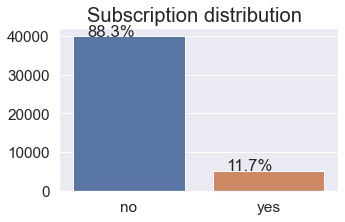

In [85]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(5,3))
fig.suptitle('Subscription distribution')
#axes.set_title('S')
sns.barplot(ax=axes, x=df['Target'].value_counts().index, y=df['Target'].value_counts().values);
T = len(df['Target'])
for p in axes.patches:
            axes.annotate('{:.1f}%'.format(100*p.get_height()/T), (p.get_x()+0.1, p.get_height()+5))

# Creat a new data frame with pd.concat containing the count of customers and percentages

Target = pd.concat([df['Target'].value_counts(), df['Target'].value_counts(normalize=True)*100.00],axis=1)
Target.columns=['Count: Subsciption', '% (Subscription)']
Target

With only 11.7% subscribed and 88.3% unsubscribed customers our dataset is highly imbalanced. 

### Numerical features

Let us now turn to the numerical features of our dataset. 

In [86]:
numerical_features = list(df.select_dtypes(include=('int64','float64')).axes[1])
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [87]:
# plot the distribution of numerical columns using histograms
def plot_distribution(df,columns):
    sns.set()
    axes = []
    i=0

    while i<len(columns):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        sns.histplot(df[columns[i]],bins=15,color='blue',ax=ax1)
        ax1.set_xlabel(columns[i], fontsize=20)
        ax1.set_ylabel('Count', fontsize=20)
        try:
            sns.histplot(df[columns[i+1]],bins=15,color='blue',ax=ax2)
            ax2.set_xlabel(columns[i+1], fontsize=20)
            ax2.set_ylabel('Count', fontsize=20)
        except:
            print('Warning: Odd number of variables provided. One plot will be empty')
        i+=2
        axes.append(ax1)
        axes.append(ax2)
    return axes

    

#### Age and balance

                 age        balance
count   45211.000000   45211.000000
mean       40.936210    1362.272058
std        10.618762    3044.765829
min        18.000000   -8019.000000
25%        33.000000      72.000000
50%        39.000000     448.000000
75%        48.000000    1428.000000
max        95.000000  102127.000000
median     39.000000     448.000000


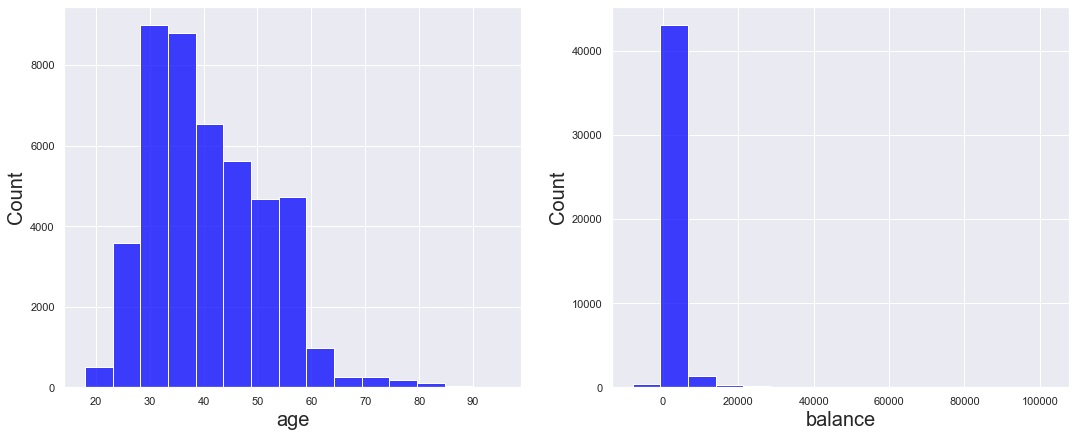

In [88]:
# Create dataframe containing stastistical summary of numerical features
stat_summary_numericals = df[numerical_features].describe()
stat_summary_numericals.loc['median'] = df[numerical_features].median()
print(stat_summary_numericals[['age','balance']].head(12))
# create list consisting of age and balance
numerical_age_balance = ['age','balance']

# plot histogram of age and balance
plot_distribution(df,numerical_age_balance);

##### Distribution of age 

The age of customers contacted by the bank during the telemarketing extends from a minium age of 18 years to a maximum age of 95 years old. The majority of customer contacted by the bank were in their 30s and 40s (33 to 48 years land within 25th and 75 th percentiles). With an average age of 41 years old and a standard deviation of 10 years, the distribution of age is close to normal distribution.  

##### Distribution of account balance

The customers contacted include those with posititive and negative account balances. The distribution of account balances is highly skewed. The account balance of the customers called by the bank extends from -8019.0 to 102127.0 euros, resulting to a range of 110146 euros. With a mean of 1362 euros and standard deviation of 3044 euros, the balance distribution is highly skewed and far from normal. There are significant number of outliers as can be seen by looking how far the minimum and maximum values from the mean. 

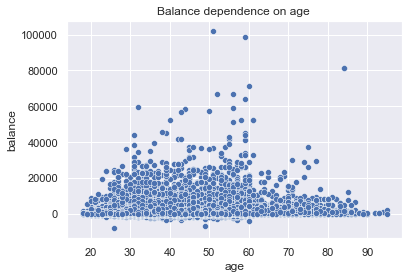

In [89]:
scatter_age_balance = sns.scatterplot(x = 'age',y='balance',data=df)

plt.title('Balance dependence on age ')
plt.show()

There is no clear dependence of account balance on the customer's age. However, in general customers over the age of 60 and less than 20 years old seem to possess smaller account balances. This may be due to the fact the younger customers are in the process of establishing themsleves while the older customers have already retired and may not have any reliable source of income. 

#### Duration and Campaign distribution

            duration      campaign
count   45211.000000  45211.000000
mean        4.302729      2.763841
std         4.292132      3.098021
min         0.000000      1.000000
25%         1.720000      1.000000
50%         3.000000      2.000000
75%         5.320000      3.000000
max        81.970000     63.000000
median      3.000000      2.000000


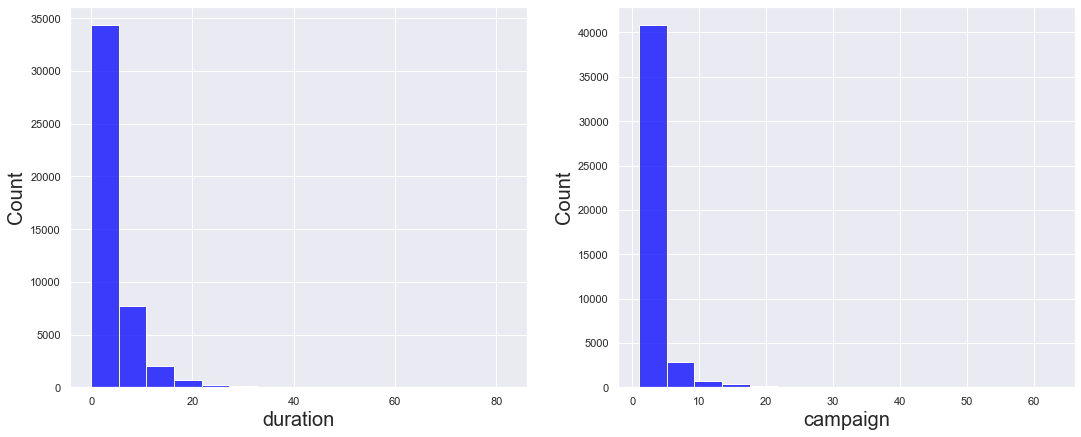

In [90]:
numerical_duration_campaign = ['duration', 'campaign']
print(stat_summary_numericals[['duration','campaign']].head(12))
# plot histogram of duration and campaign
plot_distribution(df,numerical_duration_campaign);


##### Distribution of duration
The duration of a phone call made during the telemarketing extends from a minimum of 0 minutes to a maximum of 81.9 minutes. With mean duration of 4.3 minutes and median duration of 3 minutes, the distribution of the duration of all the calls during the telemarketing is left skewed; meaning most of the calls are of short duration, typically less than 5 minutes. 

##### Distribution of campaing

The number of contacts performed during this campaign and for this client is plotted in the histogram plot shown above. The number of contacts made a client ranged from a minimum of 1 call to an etreme maximum of 63 calls. However, the majority of the calls required 1 to 3 contacts only (25 percentile to 75 percentile); indicating contacts more than 10 are outliers in the distribution.

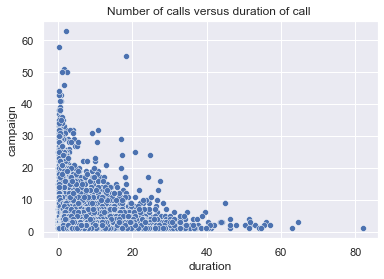

In [91]:
scatter_duration_campaign = sns.scatterplot(x = 'duration',y='campaign',data=df)

plt.title('Number of calls versus duration of call ')
plt.show()

Generally, the call duration decreases as the number of contacts during the campaign increases. The largest number of contacts made resulted to lowest call duration. 

#### pdays and previous
`pdays` The number of days that passed by after the client was last contacted from a previous campaign, <br>
`previous:` number of contacts performed before this campaign and for this client

               pdays      previous
count   45211.000000  45211.000000
mean       40.197828      0.580323
std       100.128746      2.303441
min        -1.000000      0.000000
25%        -1.000000      0.000000
50%        -1.000000      0.000000
75%        -1.000000      0.000000
max       871.000000    275.000000
median     -1.000000      0.000000


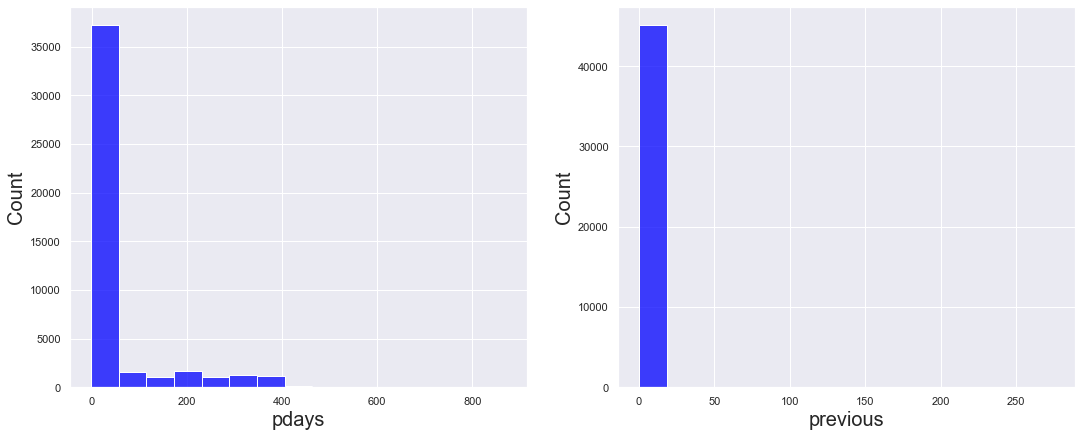

In [92]:
numerical_pdays_previous = ['pdays', 'previous']
print(stat_summary_numericals[['pdays','previous']].head(12))
# plot histogram of pdays and previous
plot_distribution(df,numerical_pdays_previous);


#####  pdays distribution

The average number of days that passed after a client was contacted from the previous campaign is about 40 days. The maximum number of days is 871 while the minimum number of days as well as the median is -1. 

##### Previous distribution

The average number of contacts made before this campaign is 0.58 and the maximum number of contacts is 275 and the minmum is 0. For the most part, no previous contacts were made by the bank (0 contacts made within 75 percentile). 



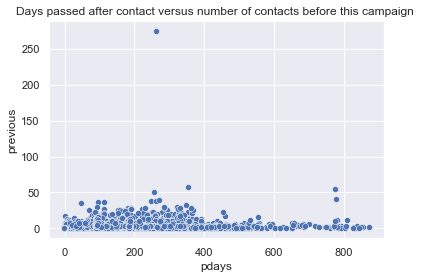

In [93]:
scatter_pdays_previous = sns.scatterplot(x = 'pdays',y='previous',data=df)

plt.title('Days passed after contact versus number of contacts before this campaign ')
plt.show()

#### Distribution of contact day
last contact day of the month

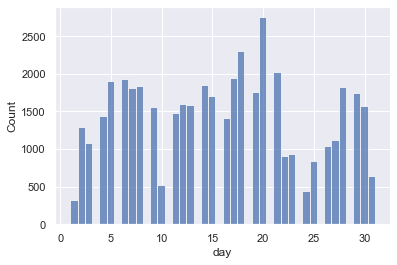

In [94]:
sns.histplot(df['day']);

Since the day of the month last customer was contacted is not related to customer information, it does not have any value in providing future predictions whether a customer will subscribe to a term deposit or not. Hence, we decided to drop this feature from our dataset. 

In [95]:
# drop feature 'day' from our dataset
df.drop(columns='day',axis=1,inplace=True)


In [96]:
df.shape

(45211, 16)

#### Correlation matrix

In [97]:
numerical_features.remove('day')

In [98]:
numerical_features

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

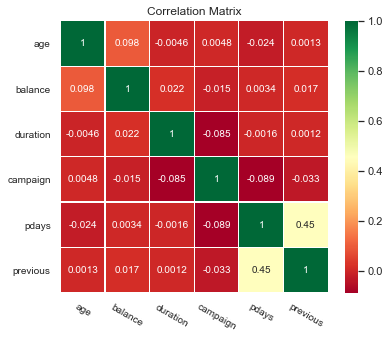

In [99]:
corr = df[numerical_features].corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


To investigate the interdependence between each numerical feature, a correlation matrix was plotted with all numerical features. clearly, the average number of days that passed after a client was contacted from the previous campaign (`pdays`) is positively correlated with the average number of contacts made before this campaign `previous`. This is not consistent with what we observed with the scatter plot of `pdays` and `previous` as shown above.

# Exploratory Data Analysis (EDA)

In [100]:
# Group months into seasons for easier analysis
winter = ['dec','jan','feb']
spring = ['mar','apr','may']
summer = ['jun','jul','aug']
fall = ['sep','oct','nov']
df.replace(winter,'winter [12-2]',inplace=True)
df.replace(spring,'spring [3-5]',inplace=True)
df.replace(summer,'summer [6-8]',inplace=True)
df.replace(fall,'fall [9-11]',inplace=True)
df['month'];

In [101]:
# Group customers based on their age and create a new feature called age_group
lst_df = [df]
for column in lst_df:
    column.loc[column["age"] < 35,  'age_group'] = '<35'
    column.loc[(column["age"] >= 35) & (column["age"] <= 50), 'age_group'] = '35-50'
    column.loc[(column["age"] > 50) & (column["age"] <= 65), 'age_group'] = '50-65'
    column.loc[(column["age"] > 65), 'age_group'] = '65+'
#    column.loc[column["age"] >= 60, 'age_group'] = 60

In [102]:
# Also let's group customers based on thier account balance as well and create new feature called balance_group.

lst_df = [df]
for column in lst_df:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 500), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 500) & (column["balance"] <= 3500), 'balance_group'] = 'avg balance'
    column.loc[(column["balance"] > 3500), 'balance_group'] = 'high balance'


In [103]:
# add newly added categorial features (age_group and balance_group) to our list of categorical features. 
categorical_features.append('age_group')
categorical_features.append('balance_group')
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target',
 'age_group',
 'balance_group']

In [104]:
# Group data frame into two groups based on target value
df_group_by_target = df.groupby('Target')
for target,df_group in df_group_by_target:
    if target == 'yes':
        df_subscribed = df_group
    if target == 'no':
        df_unsubscribed = df_group

In [105]:
# Function to create a new dataframe consisting of value counts of a given categorical features 
# along with counts of subscribed, unsubscribed, total, and percent subscribed for a given value of
# a catgorical feature
# function returns a dictionary of dataframes with keys corresponding to categorical features input
# in the argument of the function as a list.
def create_df_sub(cat_features):
#    i = 0
    dict_df_sub = {}
#    while i <= len(cat_features):
    for feature in cat_features:   
        temp1 = df_subscribed[feature].value_counts()
        temp2 = df_unsubscribed[feature].value_counts()
        df1 = pd.concat([temp1,temp2],axis=1)
        df1.columns = ['Subscribed', 'Unsubscribed']
        total = df1['Subscribed'] + df1['Unsubscribed']
        df1['Total'] = total
        df1['% Subscription'] = (df1['Subscribed']/df1['Total'])*100
        dict_df_sub[feature] = df1
    return dict_df_sub

In [106]:
# Function for plotting subscription rate for a given feature value_count. 
def plot_features_vs_target(features_list):
        dict_df_sub = create_df_sub(features_list)
        axes = []
        i = 0
        for feature in features_list:
            if feature in demographic_cat_features:
                label = 'Customer demographic'
            if feature in financial_cat_features:
                label = 'Financial data segmented'
            if feature in campaign_cat_features:
                label = 'Previous and past campaign result segmented'
            fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,5))
            if i == 0 and feature in demographic_cat_features:
                fig.suptitle(label + ' resolved subscription number and rate' , fontsize=22)
            if i == 0 and feature in financial_cat_features:
                fig.suptitle(label + ' subscription number and rate' , fontsize=22)
            plt.tight_layout()
            df_temp = dict_df_sub[feature]
            
    
            ax1.set_title(feature + ' resolved percent subscribed',fontname='Comic Sans MS', fontsize=18)
            ax2.set_title('Total subscription per ' + feature,fontname='Comic Sans MS', fontsize=18)

            ax1.set_xlabel(feature + ' status',fontsize=16)
#            plt.xticks(fontsize=10,rotation=-30)
            #ax1.set_xticklabels(rotation=-30)
            ax2.set_xlabel(feature + ' status',fontsize=16)
            plt.xticks(fontsize=10,rotation=0)
            sns.barplot(ax=ax1, x=df_temp.index, y='% Subscription',data=df_temp);
            sns.barplot(ax=ax2, x=df_temp.index, y='Subscribed',data=df_temp);
#            ax1.set_ylabel('% Subscription',fontsize=16)
            var1 = ax1.get_xticklabels();
#            var2 = ax2.get_xticklabels();
#            var3 = ax1.get_yticklabels();
#            var4 = ax2.get_yticklabels();
            ax1.set_xticklabels(var1,rotation=0,fontsize=16);
#            ax2.set_xticklabels(var2,rotation=0,fontsize=16);
#            ax1.set_yticklabels(var3,rotation=0,fontsize=16);
#            ax2.set_yticklabels(var4,rotation=0,fontsize=16);
            axes.append(ax1)
            axes.append(ax2)
            i = i + 1
        return axes


In [107]:
# call function above with an argument ['job'] to get a dictionary whose value is a dataframe
# dict['job'] = dataframe (consisting of subscribed, unsubscribed, %, and total)

dict_df_sub = create_df_sub(['job'])
df_jobs_sub = dict_df_sub['job']
df_jobs_sub

,Subscribed,Unsubscribed,Total,% Subscription
management,1301,8157,9458,13.755551
technician,840,6757,7597,11.056996
blue-collar,708,9024,9732,7.274969
admin.,631,4540,5171,12.202669
retired,516,1748,2264,22.791519
services,369,3785,4154,8.883004
student,269,669,938,28.678038
unemployed,202,1101,1303,15.502686
self-employed,187,1392,1579,11.842939
entrepreneur,123,1364,1487,8.271688


## Subscription rate per job category

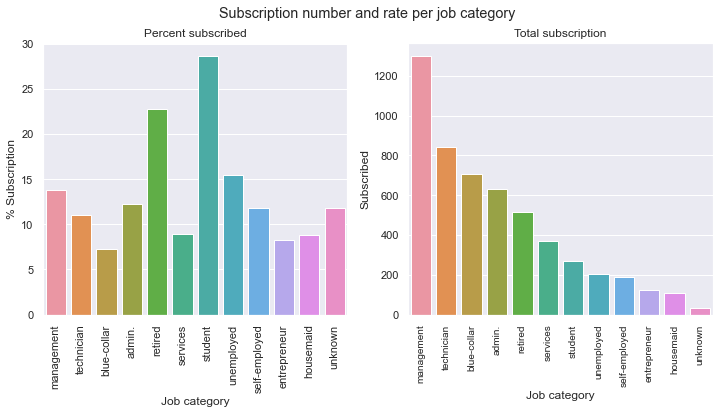

In [108]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,5))
fig.suptitle('Subscription number and rate per job category')
ax1.set_title('Percent subscribed')
ax2.set_title('Total subscription')
#axes.set_title('S')
#df_jobs_temp = df_jobs_sub.sort_values(by=['% Subscription'],ascending=False)
ax1.set_xlabel('Job category')
plt.xticks(fontsize=10,rotation=-30)
#ax1.set_xticklabels(rotation=-30)
ax2.set_xlabel('Job category')
plt.xticks(fontsize=10,rotation=90)
sns.barplot(ax=ax1, x=df_jobs_sub.index, y='% Subscription',data=df_jobs_sub);
sns.barplot(ax=ax2, x=df_jobs_sub.index, y='Subscribed',data=df_jobs_sub);
var1 = ax1.get_xticklabels();
ax1.set_xticklabels(var1,rotation=90);

Though the bank contacted the largest number of people in job segment category of `blue-collar`, and the number of students the bank contacted was small, the percentage of students who subscribed to term deposit is the largest. We recommend the bank contact more students in the next telemarketing campaign.

## Demographics versus subscription rate

### Marital status and education level

In [109]:
marital_education = ['marital', 'education']

In [110]:
dict_df_sub = create_df_sub(marital_education)
df_marital_sub = dict_df_sub['marital'] 
df_education_sub = dict_df_sub['education']
df_marital_education_sub = pd.concat([df_marital_sub,df_education_sub],axis=0,keys=['marital status','education'])
df_marital_education_sub.head(12)

Subscribed  Unsubscribed  Total  % Subscription
marital status married          2755         24459  27214       10.123466
               single           1912         10878  12790       14.949179
               divorced          622          4585   5207       11.945458
education      secondary        2450         20752  23202       10.559435
               tertiary         1996         11305  13301       15.006390
               primary           591          6260   6851        8.626478
               unknown           252          1605   1857       13.570275

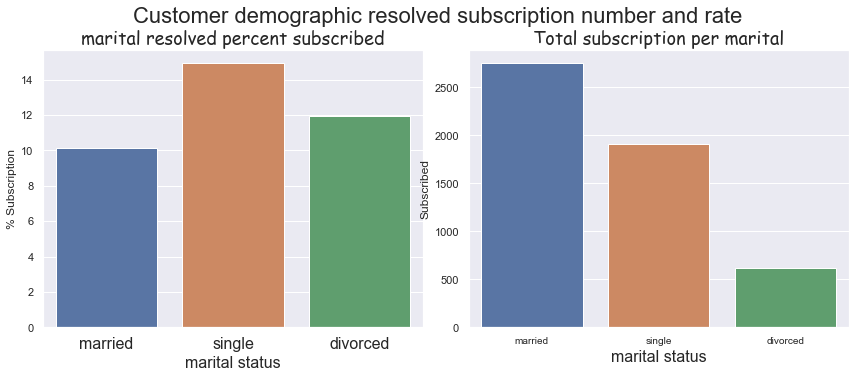

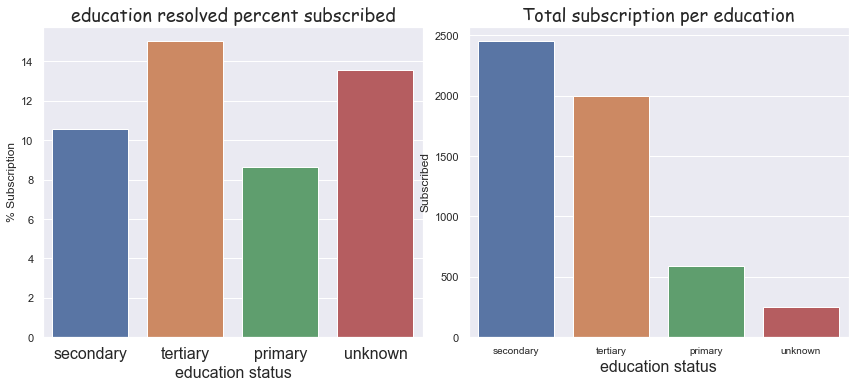

In [111]:
plot_features_vs_target(marital_education);

##### Marital status
The largest number of customers who subscribed are married. This is due to the bank contacted more married people during this telemarketing. Nevertheless, unmarried people are more likely to subscribe (50% more probable than that of married people) though the total number of single subscribers is less than the total number of married subscribers. the rate of subscription for divorced people is also greater than that of married people. We recommend the bank target more single and divorced people in its next telemarketing campaign for term deposit subscription. In contrast, the most probable customers to enroll for the term deposit have completed tertiary level of education. The educational level of the second largest probable group to enroll for the term deposit is unknown; with subscription rate of approximately equal to the average of the three remaining groups. This corroborates the claim the telemarketer forgot to record the educational level of some of the customers contacted.  
##### Educational level

The largest number of subscribers have completed secondary education. Customers with unregistered `unknown` educational level are the least subscribers. The telemarketer might have forgotten to register or the customers might have not been willing to expose their educational level. In contrast, the most probable customers to enroll for the term deposit have completed tertiary level of education. The educational level of the second largest probable group to enroll for the term deposit is unknown; with subscription rate of approximately equal to the average of the three remaining groups. This corroborates the claim the telemarketer forgot to record the educational level of some of the customers contacted. Customers who completed primary education are the least subscribers and are least probable to subscriber. 
In its next telemarketing we recommend the bank target more customers who completed tertiary education.

## Financial data versus subscription rate

### Credit, housing loan, and personal loan

In [112]:
dict_df_sub = create_df_sub(financial_cat_features)
df_credit_sub = dict_df_sub['default'] 
df_housing_sub = dict_df_sub['housing']
df_loan_sub = dict_df_sub['loan']
df_credit_housing_loan_sub = pd.concat([df_credit_sub,df_housing_sub,df_loan_sub],axis=0,keys=['Has credit?','Has housing loan?','Has personal loan?'])
df_credit_housing_loan_sub.head(12)

Subscribed  Unsubscribed  Total  % Subscription
Has credit?        no         5237         39159  44396       11.796108
                   yes          52           763    815        6.380368
Has housing loan?  no         3354         16727  20081       16.702355
                   yes        1935         23195  25130        7.699960
Has personal loan? no         4805         33162  37967       12.655727
                   yes         484          6760   7244        6.681391

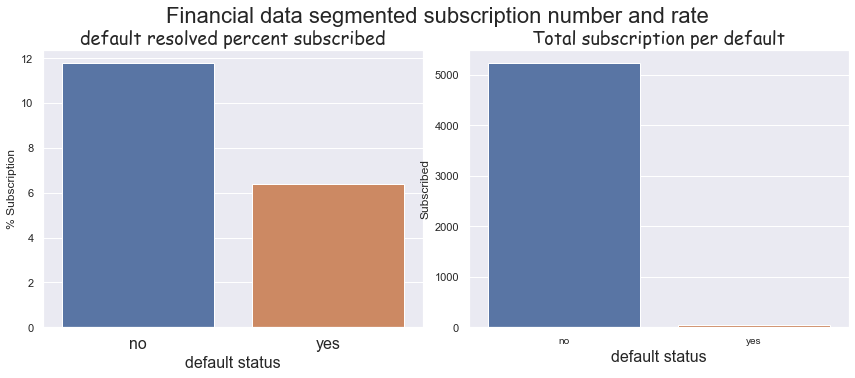

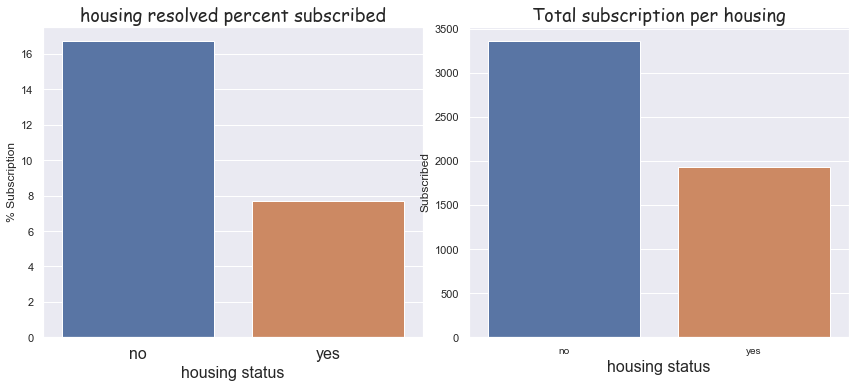

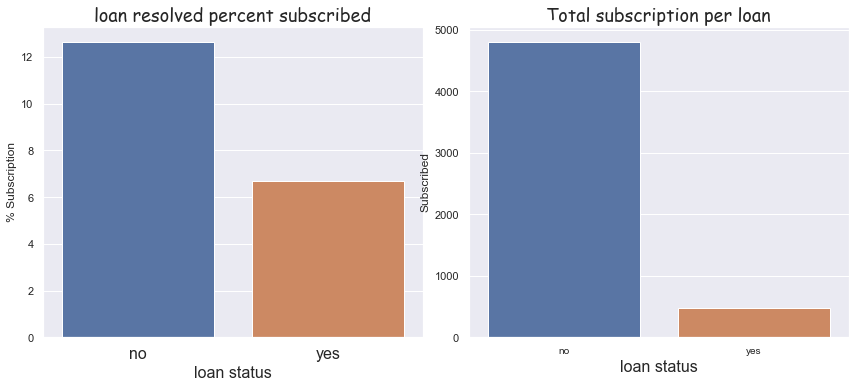

In [113]:
plot_features_vs_target(financial_cat_features);


##### Credit

The number of customers who have credit and subscribed to term deposit is negligibly small. Most subscribers do not have credit. Moreover, the subscription rate of customers with no credit is about 2 times higher than those with credit. In the next telemarkering, we recommend the bank focus on customers with no credit. 

##### Housing loan

The total number of subscribed customers as well as the rate of subscription is significantly higher for people with no housing loan as compared to customers that possess housing loan (about 2 times higher). This is consitent with our previous observation based on marital status of customers where the sbuscription rate is the highest for single (unmarried) people. 

##### Personal loan

Similary, the number as well as rate of subscription is the largest for customer groups with no personal loans. 

## Campaign data versus subscription rate

In [114]:
campaign_cat_features

['contact', 'month', 'poutcome']

### Contact method, season contacted, and previous marketing outcome

In [115]:
dict_df_sub = create_df_sub(campaign_cat_features)
df_contact_sub = dict_df_sub['contact'] 
df_month_sub = dict_df_sub['month']
df_poutcome_sub = dict_df_sub['poutcome']
df_contact_month_poutcome_sub = pd.concat([df_contact_sub,df_month_sub,df_poutcome_sub],axis=0,keys=['Contact method','Season contacted','Previous marketing outcome'])
df_contact_month_poutcome_sub.head(12)

Subscribed  Unsubscribed  Total  \
Contact method             cellular             4369         24916  29285   
                           unknown               530         12490  13020   
                           telephone             390          2516   2906   
Season contacted           summer [6-8]         1861         16622  18483   
                           spring [3-5]         1750         15425  17175   
                           fall [9-11]           995          4292   5287   
                           winter [12-2]         683          3583   4266   
Previous marketing outcome other                3693         35106  38799   
                           success               978           533   1511   
                           failure               618          4283   4901   

                                          % Subscription  
Contact method             cellular            14.918900  
                           unknown              4.070661  
                           telephone           13.420509  
Season contacted           summer [6-8]        10.068712  
                           spring [3-5]        10.189229  
                           fall [9-11]         18.819747  
                           winter [12-2]       16.010314  
Previous marketing outcome other                9.518287  
                           success             64.725347  
                           failure             12.609671

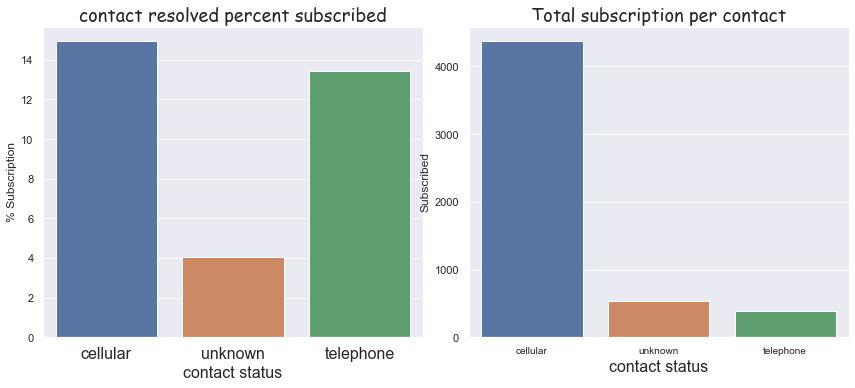

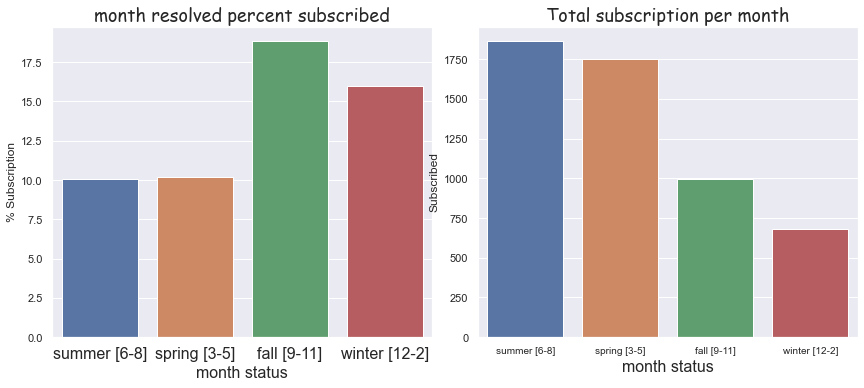

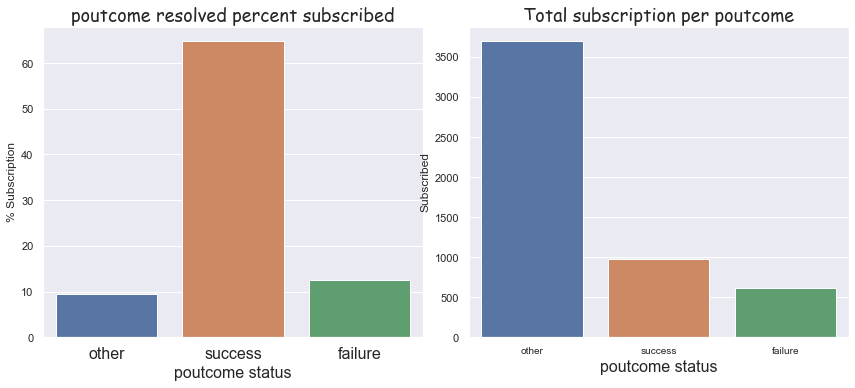

In [116]:
plot_features_vs_target(campaign_cat_features);

##### Method of contact

Though the majority of the subscribed customers were enrolled throuth talling over cellular phones, the subscription rates for contacts with land line phones and cellular phones are comparable. The larger number of contacts and hence subscription via cellular phones could simply be due to the larger number of customers using cellular phones. Since, whether using cellular or land line does not yield to an appreciable change in subscription rate; the bank should not worry on the type of communication during its telemarketing. We will drop the feature `contact` during our machine learning developlment as it carries no significant impact on the targeting customers. 

##### Contact season

During this telemarketing the bank conducted the majority of its contacts during summer and spring seasons and obtained a large number of subscribers. Considering summer as a primary vacation season and spring the tax return season, the bank was able to contact a large number of people and get them subscribed. However, the subscription rate of the contacted customers is the highest during fall and winter season. Though this might be studies farther by including more historical data, during this campaign the bank would have better benefitted if it were to rigourously initiate its telemarketing during fall and winter seasons. 

##### Previous outcome

From the histogram plot of the previous outcome status of a customer as, we find that a customer who responded favourably during past campaign is more likely to respond favourably during the current campaign. 


#### Age group and balance group

In [117]:
dict_df_sub = create_df_sub(['age_group','balance_group'])
df_age_sub = dict_df_sub['age_group'] 
df_balance_sub = dict_df_sub['balance_group']
#df_poutcome_sub = dict_df_sub['poutcome']
df_age_balance_sub = pd.concat([df_age_sub,df_balance_sub],axis=0,keys=['Age group','Balance group'])
df_age_balance_sub.head(12)

Subscribed  Unsubscribed  Total  % Subscription
Age group     35-50               1996         18947  20943        9.530631
              <35                 1980         13033  15013       13.188570
              50-65                993          7511   8504       11.676858
              65+                  320           431    751       42.609854
Balance group avg balance         2356         14541  16897       13.943304
              low balance         1680         14705  16385       10.253280
              high balance         751          3898   4649       16.154012
              no balance           502          6778   7280        6.895604

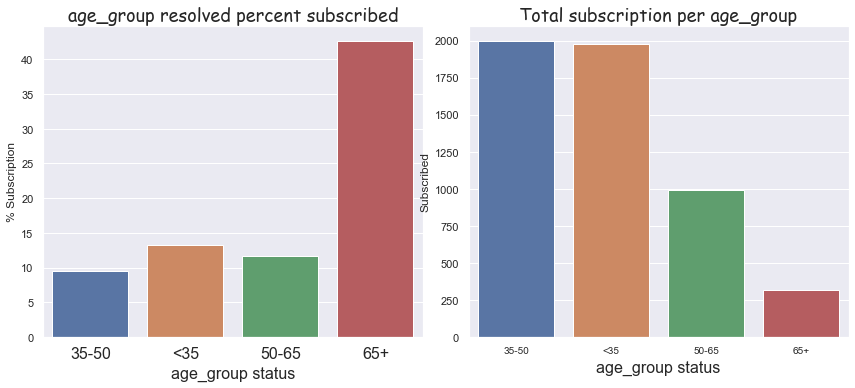

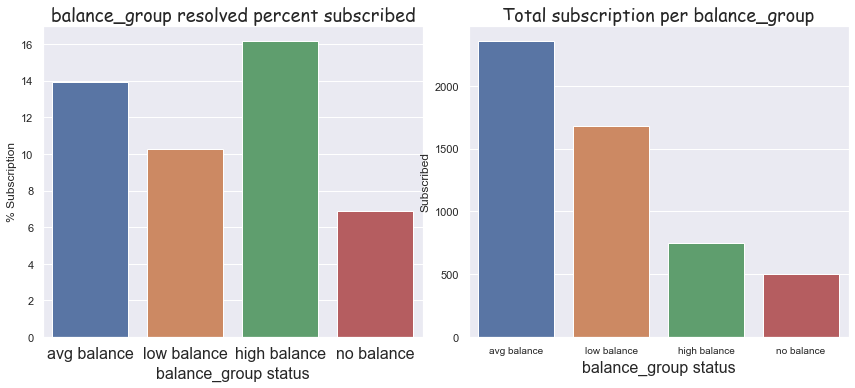

In [118]:
plot_features_vs_target(['age_group','balance_group']);

##### Age disbribution
The plot shows that senior people (age > 65) and youngest people (age <35) have the highest subscription rate and we recommend the bank targets these age groups in its future telemarketing campaign instead of focusing on the youngest and middle aged people. The subscription rate of the seniors is over 40\%. However, during this telemarketing the bank focused the least on seniors as can be seen by the total smallest number of subscribers which totalled to only 320 customers. The subscription rate for the middle aged group is about 9\% only and yet the bank focused too much on these group and obtained a total of about 2000 subscriber out of the 22000 customer contacted for these age group. 

# END WRANGLING AND EDA

## Save clean and organized data

In [124]:
df_temp = df.drop(columns=['age_group','balance_group'])
df.head()
# save the data to a new csv file
datapath = '../data'
save_file(df_temp, 'bank_data_cleaned.csv', datapath)
df_temp.head()

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\bank_data_cleaned.csv"


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,spring [3-5],4.35,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,unknown,spring [3-5],2.52,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,spring [3-5],1.27,1,-1,0,other,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,spring [3-5],1.53,1,-1,0,other,no
4,33,unknown,single,unknown,no,1,no,no,unknown,spring [3-5],3.30,1,-1,0,other,no
